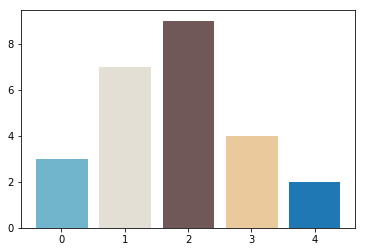

In [21]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import pandas as pd

def Hex2RGB(couleurHex):
    couleur_RGB=[]
    rouge = int(couleurHex[1:3],16)
    couleur_RGB.append(rouge)
    vert = int(couleurHex[3:5],16)
    couleur_RGB.append(vert)
    bleu = int(couleurHex[5:7],16)
    couleur_RGB.append(bleu)
    return(couleur_RGB)

n_clusters = 5

df = pd.read_json('user0.json')
numarray = df["Couleur1"].tolist()
for i in range(len(numarray)):
    numarray[i] = Hex2RGB(numarray[i])
clusters = KMeans(n_clusters)
clusters.fit(numarray)
npbins = numpy.arange(0, n_clusters+1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color('#%02x%02x%02x' % (
    math.ceil(clusters.cluster_centers_[i][0]), 
        math.ceil(clusters.cluster_centers_[i][1]),
    math.ceil(clusters.cluster_centers_[i][2])))
plot.show()

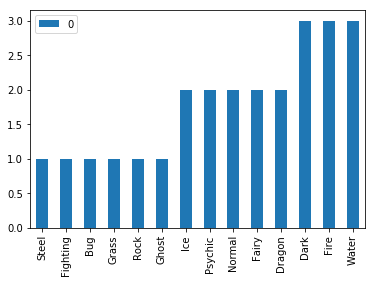

In [35]:
from collections import Counter

typeCount = Counter(df["Type1"].tolist())
dfc = pd.DataFrame.from_dict(typeCount, orient='index').sort_values(by=[0], ascending=False)
dfc.plot(kind='bar')

plot.show()

In [33]:
dfc

,0
Dark,3
Ice,2
Psychic,2
Fire,3
Steel,1
Normal,2
Water,3
Fairy,2
Fighting,1
Bug,1
